In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import pymc as pm
import seaborn as sns
import arviz as az

def median(x):
    return np.median(x)

print('Pymc version: ', pm.__version__)
print('Arviz version:', az.__version__)

Pymc version:  4.1.4
Arviz version: 0.15.1


## Data Import and Visualization

In [9]:
df = pd.read_csv(data_file)

df['SC_ID'] = df['SC_ID'].str.strip()
sousa_names = df['SC_ID'].unique()

id_idx_lookup = {name: idx for idx, name in enumerate(sousa_names)}
sousa_idx = df['SC_ID'].replace(id_idx_lookup)
df['calenderyear_idx'] = df['CalenderYear'].astype(int)

print('Number of Individuals:', len(sousa_names))
print(sousa_names[0:5])

Number of Individuals: 38
['HKSC071109' 'HKSC101506' 'HKSC101908' 'HKSC110602-2' 'HKSC110607']


In [5]:
sex_stats = df.groupby('Sex')['d15N'].agg(['mean', 'std']).round(2)
print(f"Male   d15N: mean ± SD = {sex_stats.loc['M', 'mean']} ± {sex_stats.loc['M', 'std']}")
print(f"Female d15N: mean ± SD = {sex_stats.loc['F', 'mean']} ± {sex_stats.loc['F', 'std']}")

sex_stats = df.groupby('Sex')['d13C'].agg(['mean', 'std']).round(2)
print(f"Male   d13C: mean ± SD = {sex_stats.loc['M', 'mean']} ± {sex_stats.loc['M', 'std']}")
print(f"Female d13C: mean ± SD = {sex_stats.loc['F', 'mean']} ± {sex_stats.loc['F', 'std']}")

Male   d15N: mean ± SD = 13.96 ± 1.33
Female d15N: mean ± SD = 13.74 ± 1.28
Male   d13C: mean ± SD = -15.66 ± 1.04
Female d13C: mean ± SD = -14.46 ± 0.66


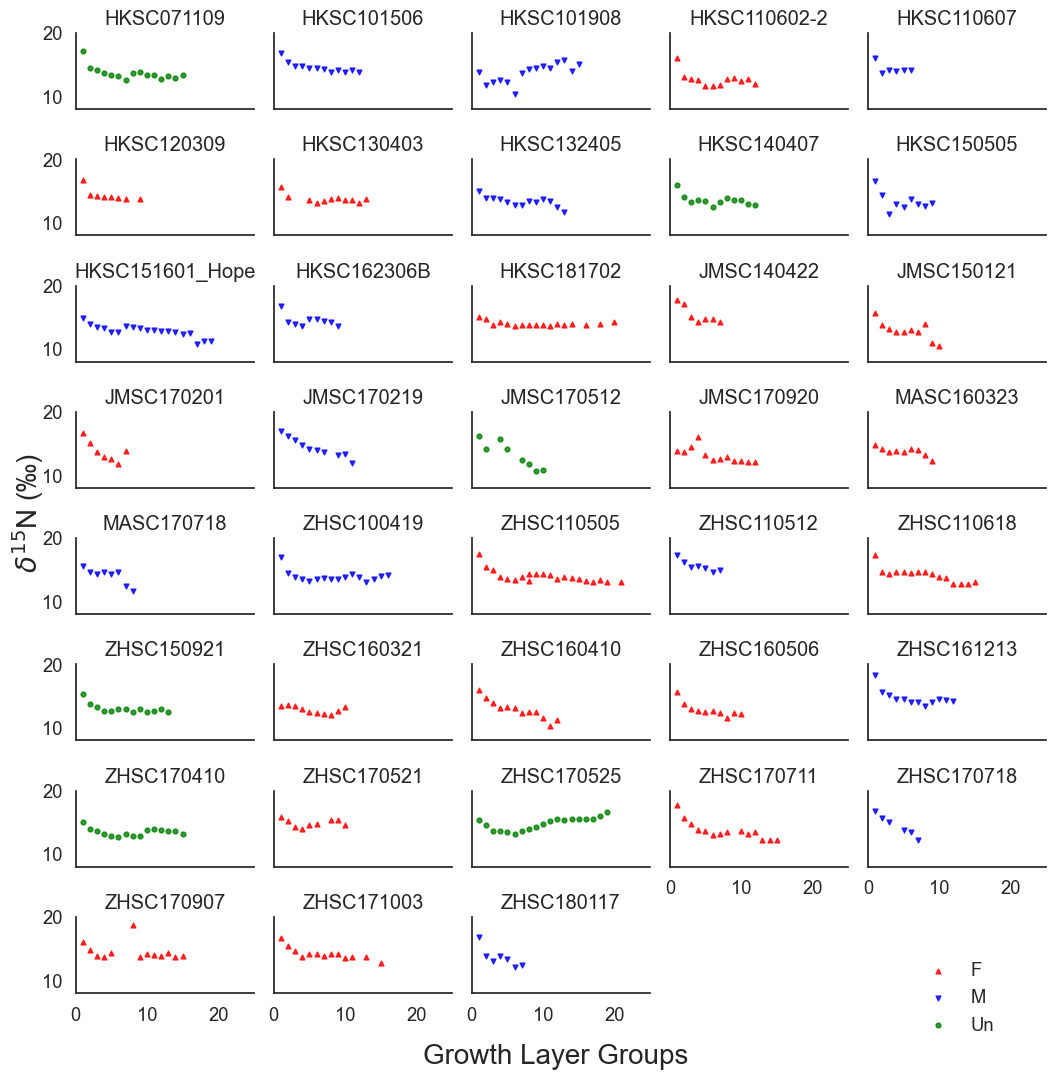

In [6]:
sns.set(style="white", context="notebook", font_scale=1.2)
custom_palette = {"M": "blue", "F": "red", "Un": "green"}
markers = ["^", "v", "o"]
hue_order = ["F", "M", "Un"]

# Create lmplot
g = sns.lmplot(
    x='GLG', y='d15N', hue='Sex', col='SC_ID', col_wrap=5,
    data=df.sort_values('SC_ID'), aspect=1.4, height=2, x_jitter=0.0, fit_reg=False, hue_order=hue_order, 
    palette=custom_palette, facet_kws={'legend_out': False}, markers=markers, scatter_kws={"s": 12})

g.set(ylim=(8, 20), xlim=(0, 25))
g.set_titles("{col_name}")

g._legend.set_bbox_to_anchor((5.25, -11))
g._legend.set_title("")
g._legend.set_frame_on(False)
g.despine()
plt.subplots_adjust(top=0.75, bottom=0.15, right=0.75)
g.set_ylabels("")
g.fig.text(0.01, 0.45, "$\delta^{15}$N (‰)", va='center', rotation='vertical', fontsize=20)
g.set_xlabels('')
g.fig.subplots_adjust(bottom=0.15)
g.fig.text(0.4, 0.11, "Growth Layer Groups", ha='center', va='center', fontsize=20)

plt.show()

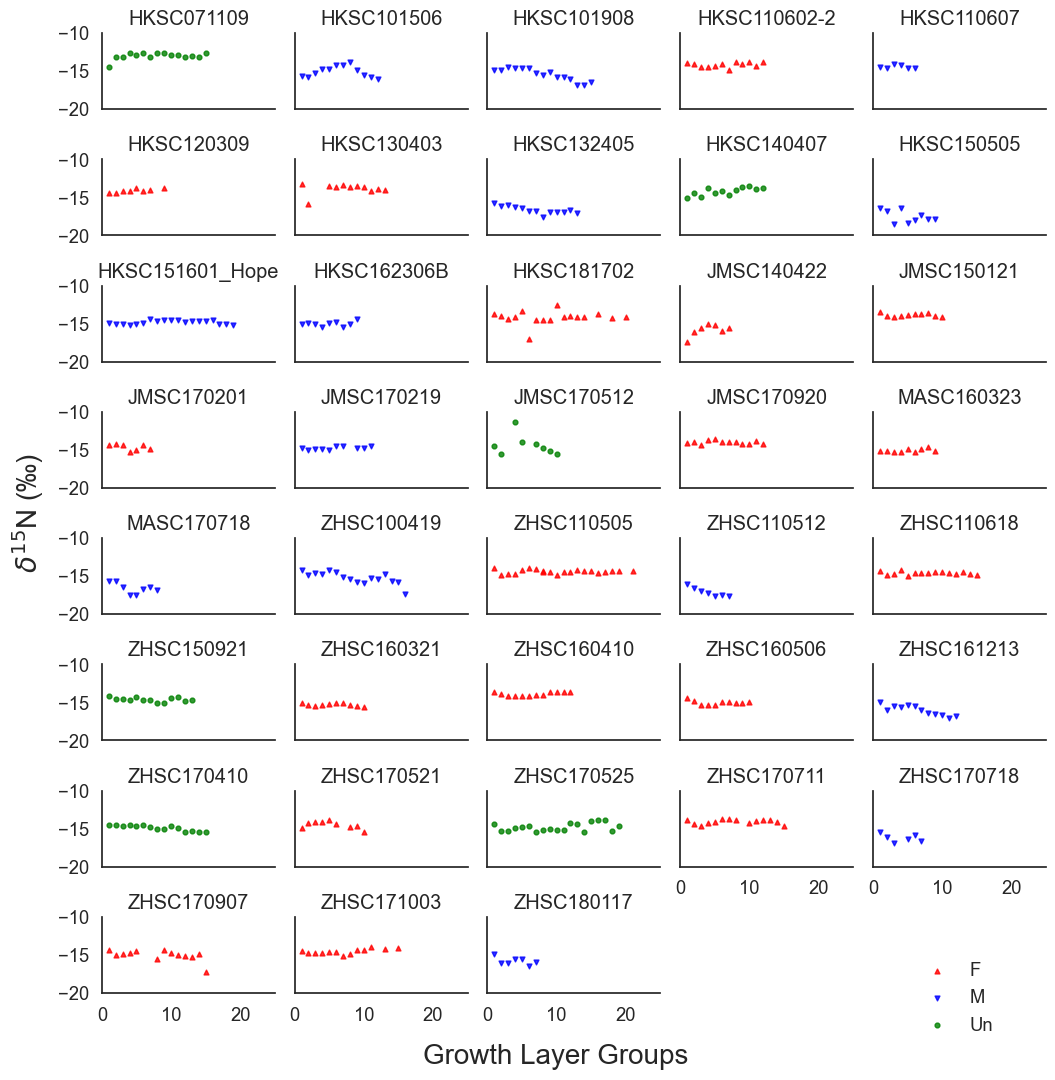

In [14]:
sns.set(style="white", context="notebook", font_scale=1.2)
custom_palette = {"M": "blue", "F": "red", "Un": "green"}
markers = ["^", "v", "o"]
hue_order = ["F", "M", "Un"]

# Create lmplot
g = sns.lmplot(
    x='GLG', y='d13C', hue='Sex', col='SC_ID', col_wrap=5,
    data=df.sort_values('SC_ID'), aspect=1.4, height=2, x_jitter=0.0, fit_reg=False, hue_order=hue_order, 
    palette=custom_palette, facet_kws={'legend_out': False}, markers=markers, scatter_kws={"s": 12})

g.set(ylim=(-20, -10), xlim=(0, 25))
g.set_titles("{col_name}")

g._legend.set_bbox_to_anchor((5.25, -11))
g._legend.set_title("")
g._legend.set_frame_on(False)
g.despine()
plt.subplots_adjust(top=0.75, bottom=0.15, right=0.75)
g.set_ylabels("")
g.fig.text(0.01, 0.45, "$\delta^{15}$N (‰)", va='center', rotation='vertical', fontsize=20)
g.set_xlabels('')
g.fig.subplots_adjust(bottom=0.15)
g.fig.text(0.4, 0.11, "Growth Layer Groups", ha='center', va='center', fontsize=20)

plt.show()

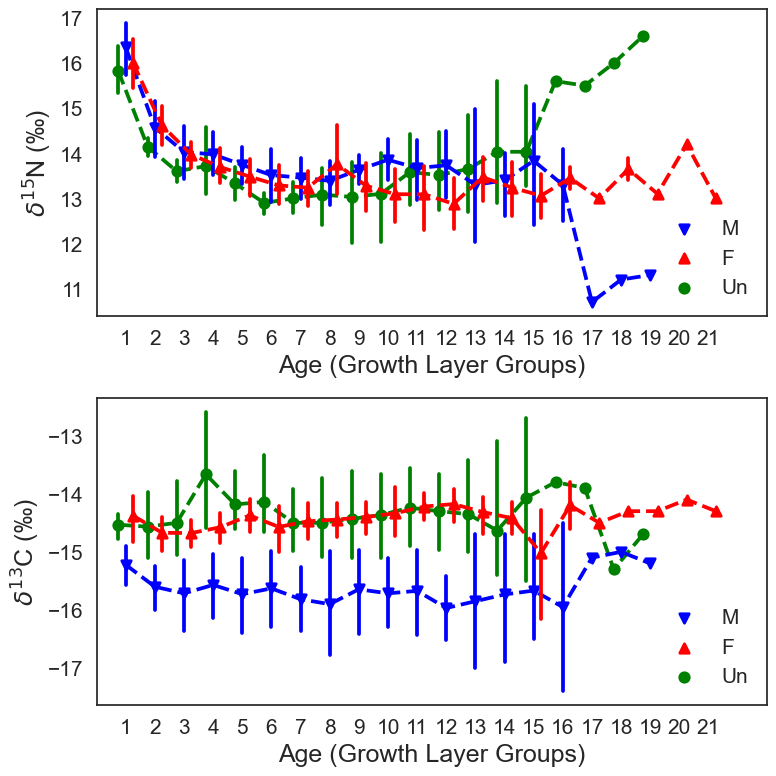

In [16]:
sns.set(style="white", context="notebook", font_scale=1.2)
fig, axes = plt.subplots(2, 1, figsize=(8, 8))
# Subplot for d15N
sns.pointplot(ax=axes[0], x='GLG', y='d15N', hue='Sex', dodge=0.5, linestyles='--', data=df,
              estimator=np.mean, errorbar=('ci', 95), 
              markers=['o', 'v', '^'], 
              palette={'M':'blue', 'F':'red', 'Un':'green'})
axes[0].set_xlabel("Age (Growth Layer Groups)", size=18)
axes[0].set_ylabel("$\delta^{15}$N (‰)", size=18)
axes[0].tick_params(axis='both', which='major', labelsize=15)
axes[0].set_xlim(-1, 22)
handles, labels = axes[0].get_legend_handles_labels()
order = [1, 2, 0]
axes[0].legend([handles[idx] for idx in order], [labels[idx] for idx in order], prop={'size': 15}, loc="lower right", frameon=False)

# Subplot for d13C
sns.pointplot(ax=axes[1], x='GLG', y='d13C', hue='Sex', dodge=0.5, linestyles='--', data=df,
              estimator=np.mean, errorbar=('ci', 95), 
              markers=['o', 'v', '^'], 
              palette={'M':'blue', 'F':'red', 'Un':'green'})
axes[1].set_xlabel("Age (Growth Layer Groups)", size=18)
axes[1].set_ylabel("$\delta^{13}$C (‰)", size=18)
axes[1].tick_params(axis='both', which='major', labelsize=15)
axes[1].set_xlim(-1, 22)
handles, labels = axes[1].get_legend_handles_labels()
order = [1, 2, 0]
axes[1].legend([handles[idx] for idx in order], [labels[idx] for idx in order], prop={'size': 15}, loc="lower right", frameon=False)

plt.tight_layout()
plt.show()

## Complete-pooling Model (Model 1)

In [25]:
with pm.Model() as pooled_model:
    switchpoint = pm.StudentT('mean_sp', mu=3.5, nu=10, sigma=1.) #Priors from Karczmarski 1999; Chang 2011
    intercept = pm.Uniform('intercept', lower=10, upper=20)
    slope_pre = pm.Normal('slope_pre', 0, sigma=2)
    slope_post = pm.Normal('slope_post', 0, sigma=2)
    # Setting Switchpoint function using pm.math.switch
    prewean = intercept + slope_pre * df.GLG
    switchpoint_d15N = pm.Deterministic('switchpoint_d15N', intercept + slope_pre * switchpoint)
    postwean = switchpoint_d15N + slope_post * df.GLG
    theta = pm.math.switch(switchpoint >= df.GLG, prewean, postwean)
    # Model Error
    sigma = pm.HalfCauchy('sigma', beta=10)
    # Model Likelihood
    likelihood = pm.Normal('likelihood', mu=theta, sigma=sigma, observed=df.d15N)

In [ ]:
with pooled_model:
    pooled_model_trace = pm.sample(10000, random_seed=42)

In [27]:
az.summary(pooled_model_trace, hdi_prob=0.95, stat_funcs={'median': median})

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,median
mean_sp,2.882,0.405,2.253,3.595,0.006,0.004,5872.0,15206.0,1.0,2.784
slope_pre,-1.328,0.296,-1.881,-0.838,0.004,0.003,5898.0,14786.0,1.0,-1.304
slope_post,-0.017,0.016,-0.048,0.016,0.000,0.000,10520.0,15487.0,1.0,-0.017
intercept,17.339,0.447,16.543,18.213,0.006,0.004,6542.0,15756.0,1.0,17.314
sigma,1.046,0.036,0.977,1.116,0.000,0.000,21613.0,20892.0,1.0,1.045
switchpoint_d15N,13.616,0.159,13.293,13.912,0.002,0.001,9495.0,14928.0,1.0,13.623


In [ ]:
az.plot_trace(pooled_model_trace, var_names=('mean_sp', 'slope_pre', 'slope_post','intercept'), compact=False)
plt.show()

## Complete-pooling model with calendar year effect as covariate (Model 1A)

In [ ]:
with pm.Model() as pooled_year_offset_model:
    switchpoint = pm.StudentT('mean_sp', mu=3.5, nu=10, sigma=1.)
    intercept = pm.Uniform('intercept', lower=10, upper=20)
    slope_pre = pm.Normal('slope_pre', 0, sigma=2)
    slope_post = pm.Normal('slope_post', 0, sigma=2)

    year_effect = pm.Normal('year_effect', mu=0, sigma=0.1)
    year_offset = (df['CalenderYear'] - df['CalenderYear'].min()) / (df['CalenderYear'].max() - df['CalenderYear'].min())

    prewean = intercept + slope_pre * df.GLG + year_effect * year_offset
    switchpoint_d15N = pm.Deterministic('switchpoint_d15N', intercept + slope_pre * switchpoint)
    postwean = switchpoint_d15N + slope_post * df.GLG
    theta = pm.math.switch(switchpoint >= df.GLG, prewean, postwean)
    # Model Error
    sigma = pm.HalfCauchy('sigma', beta=10)
    # Model Likelihood
    likelihood = pm.Normal('likelihood', mu=theta, sigma=sigma, observed=df.d15N)

In [ ]:
with pooled_year_offset_model:
    pooled_year_offset_trace = pm.sample(5000, random_seed=42, return_inferencedata=True)

In [ ]:
az.summary(pooled_year_offset_trace, hdi_prob=0.95)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mean_sp,2.881,0.407,2.240,3.599,0.008,0.005,3280.0,7120.0,1.0
slope_pre,-1.324,0.296,-1.872,-0.826,0.005,0.004,3401.0,8113.0,1.0
slope_post,-0.017,0.016,-0.049,0.015,0.000,0.000,5660.0,8572.0,1.0
year_effect,0.010,0.097,-0.178,0.203,0.001,0.001,12994.0,11261.0,1.0
intercept,17.324,0.453,16.512,18.209,0.007,0.005,3819.0,9090.0,1.0
sigma,1.045,0.036,0.974,1.113,0.000,0.000,14917.0,11550.0,1.0
switchpoint_d15N,13.617,0.160,13.294,13.916,0.002,0.002,5169.0,8927.0,1.0


## Hierarchical change-point model (Model 2)

In [36]:
n_sousa = 38
sousa_idx = df['sousa_idx_code'] = df.SC_ID.replace(id_idx_lookup).values

with pm.Model() as hierarchical_model:
    # Switchpoint
    mean_sp = pm.Normal('mean_sp', mu=3.5, sigma=3., initval=3.5)
    intercept_mean = pm.Normal('intercept_mean', 18, sigma=3.0, initval=17.)
    slope_pre_mean = pm.Normal('slope_pre_mean', 0, sigma=2, initval=-1.)
    slope_post_mean = pm.Normal('slope_post_mean', 0, sigma=2)
    
    # Priors for pre- and post-switch intercepts and slopes
    switchpoint = pm.StudentT('switchpoint', mu=mean_sp, sigma=1.0, nu=10., shape=n_sousa)
    intercept = pm.Normal('intercept', mu = intercept_mean, sigma=1.0, shape=n_sousa)
    slope_pre = pm.Normal('slope_pre', slope_pre_mean, sigma=1, shape=n_sousa)
    slope_post = pm.Normal('slope_post', slope_post_mean, sigma=1, shape=n_sousa)
    
    switchpoint_d15N = pm.Deterministic('switchpoint_d15N', intercept + slope_pre * switchpoint)
    prewean = intercept[sousa_idx] + slope_pre[sousa_idx] * df.GLG
    postwean = switchpoint_d15N[sousa_idx] + slope_post[sousa_idx] * df.GLG
    
    theta = pm.math.switch(switchpoint[sousa_idx] >= df.GLG, prewean, postwean)
    # Model Error
    sigma = pm.HalfCauchy('sigma', beta=1)
    likelihood = pm.Normal('likelihood', mu=theta, sigma=sigma, observed=df.d15N)

In [ ]:
with hierarchical_model:
    step1 = pm.NUTS([intercept_mean, slope_pre_mean, slope_post_mean])
    step2 = pm.NUTS([mean_sp]) 
    hier_trace = pm.sample(40000, tune = 10000, target_accept=.95, step=[step1,step2], random_seed=42, compute_convergence_checks=True)

In [29]:
az.summary(hier_trace, hdi_prob=0.95, stat_funcs={'median': median})

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,median
mean_sp,2.394,0.143,2.115,2.677,0.031,0.022,22.0,93.0,1.08,2.393
intercept_mean,17.434,0.256,16.940,17.948,0.039,0.028,43.0,431.0,1.03,17.434
slope_pre_mean,-1.381,0.206,-1.783,-0.978,0.018,0.013,128.0,1039.0,1.02,-1.380
slope_post_mean,-0.104,0.160,-0.421,0.206,0.001,0.001,57706.0,52155.0,1.00,-0.104
switchpoint[0],2.412,0.375,1.771,3.190,0.070,0.050,28.0,68.0,1.05,2.383
...,...,...,...,...,...,...,...,...,...,...
switchpoint_d15N[34],16.133,0.799,14.538,17.619,0.086,0.061,88.0,278.0,1.02,16.177
switchpoint_d15N[35],14.723,0.374,14.000,15.462,0.015,0.011,630.0,2251.0,1.00,14.726
switchpoint_d15N[36],14.764,0.405,13.970,15.559,0.021,0.015,357.0,1298.0,1.00,14.768
switchpoint_d15N[37],14.331,0.772,12.864,15.810,0.054,0.038,209.0,918.0,1.01,14.322


In [ ]:
az.plot_trace(hier_trace, var_names=('mean_sp', 'intercept_mean', 'slope_pre_mean', 'slope_post_mean'), compact=False) 
plt.tight_layout()
plt.show()

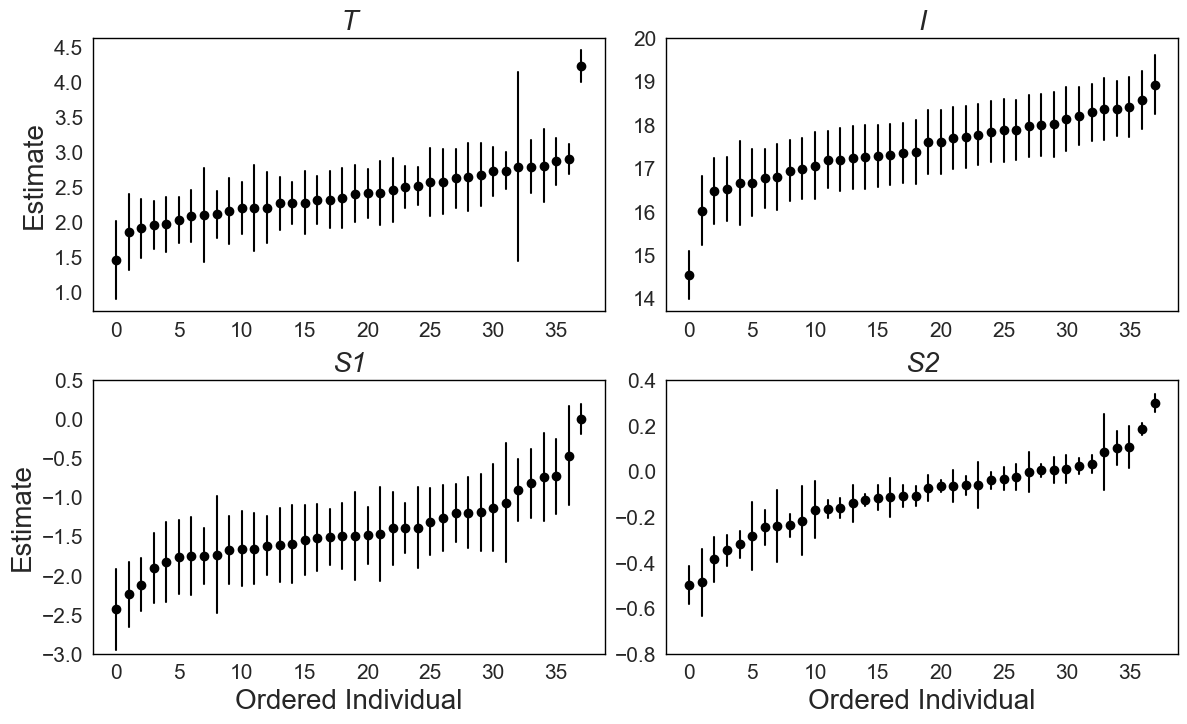

In [56]:
def plot_estimates_offset(plt, mean_values, std_values, names, offset, color, label=None):
    estimates = pd.Series(mean_values, index=names)
    se = pd.Series(std_values, index=names)
    order = estimates.sort_values().index
    positions = [i + offset for i in range(len(estimates))]
    plt.scatter(positions, estimates[order], color=color, label=label)
    for i, m, se_val in zip(positions, estimates[order], se[order]):
        plt.plot([i, i], [m-se_val, m+se_val], '-', color=color)
    plt.xticks(ticks=[i for i in range(0, 40, 5)], fontsize=15)
    plt.yticks(fontsize=15)
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1.0) 
        spine.set_visible(True)

plt.figure(figsize=(14, 8))
sns.set_style("white")

plt.subplot(2, 2, 1)
plot_estimates_offset(plt, hier_trace['switchpoint'].values.mean(axis=1)[0], hier_trace['switchpoint'].values.std(axis=1)[0], sousa_names, 0, 'black', '')
plt.title('T', fontsize=20, fontstyle='italic')
plt.ylabel('Estimate', fontsize=20)

plt.subplot(2, 2, 2)
plot_estimates_offset(plt, hier_trace['intercept'].values.mean(axis=1)[0], hier_trace['intercept'].values.std(axis=1)[0], sousa_names, 0, 'black', '')
plt.title('I', fontsize=20, fontstyle='italic')
plt.ylim(top=20)

plt.subplot(2, 2, 3)
plot_estimates_offset(plt, hier_trace['slope_pre'].values.mean(axis=1)[0], hier_trace['slope_pre'].values.std(axis=1)[0], sousa_names, 0, 'black', '')
plt.ylabel('Estimate', fontsize=20)
plt.title('S1', fontsize=20, fontstyle='italic')
plt.xlabel('Ordered Individual', size=20)
plt.ylim(-3.0, 0.5)

plt.subplot(2, 2, 4)
plot_estimates_offset(plt, hier_trace['slope_post'].values.mean(axis=1)[0], hier_trace['slope_post'].values.std(axis=1)[0], sousa_names, 0, 'black', '')
plt.title('S2', fontsize=20, fontstyle='italic')
plt.xlabel('Ordered Individual', size=20)
plt.ylim(-0.8, 0.4)

plt.subplots_adjust(hspace=0.25, wspace=0.12)
plt.show()

## Hierarchical change-point with annual effect (Model 2A)

In [ ]:
n_samples = 441
n_sousa = 38
n_years = 43

with pm.Model() as hier_annual_effect_model:
    mean_sp = pm.Normal('mean_sp', mu=3.5, sigma=3., initval=3.5)
    intercept_mean = pm.Normal('intercept_mean', 18, sigma=3.0, initval=17.)
    slope_pre_mean = pm.Normal('slope_pre_mean', 0, sigma=2, initval=-1.)
    slope_post_mean = pm.Normal('slope_post_mean', 0, sigma=2)

    switchpoint = pm.StudentT('switchpoint', mu=mean_sp, sigma=1.0, nu=10., shape=n_sousa)
    intercept = pm.Normal('intercept', mu=intercept_mean, sigma=1.0, shape=n_sousa)
    slope_pre = pm.Normal('slope_pre', mu=slope_pre_mean, sigma=1, shape=n_sousa)
    slope_post = pm.Normal('slope_post', mu=slope_post_mean, sigma=1, shape=n_sousa)
    
    year_idx = df['CalenderYear'].values - df['CalenderYear'].min()
    sigma_year = pm.Exponential('sigma_year', 1.0)
    year_effect = pm.GaussianRandomWalk('year_effect', sigma=sigma_year, shape=n_years)
    year_effect_adjusted = year_effect[year_idx]

    intercept_broadcasted = intercept[sousa_idx] + year_effect_adjusted
    slope_pre_broadcasted = slope_pre[sousa_idx]
    slope_post_broadcasted = slope_post[sousa_idx]
    switchpoint_broadcasted = switchpoint[sousa_idx]

    switchpoint_d15N = intercept + slope_pre * switchpoint + year_effect.mean(axis=0)

    prewean = intercept_broadcasted + slope_pre_broadcasted * df.GLG.values
    postwean = switchpoint_d15N[sousa_idx] + slope_post_broadcasted * df.GLG.values

    theta = pm.math.switch(df.GLG.values <= switchpoint_broadcasted, prewean, postwean)

    sigma = pm.HalfCauchy('sigma', beta=1)
    likelihood = pm.Normal('likelihood', mu=theta, sigma=sigma, observed=df['d15N'])

In [ ]:
with hier_annual_effect_model:
    step1 = pm.NUTS([intercept_mean, slope_pre_mean, slope_post_mean], max_treedepth=30)
    step2 = pm.NUTS([mean_sp], max_treedepth=30) 
    hier_annual_effect_trace = pm.sample(5000, tune = 10000, target_accept=.99, chains=2, step=[step1,step2], random_seed=42, compute_convergence_checks=False)

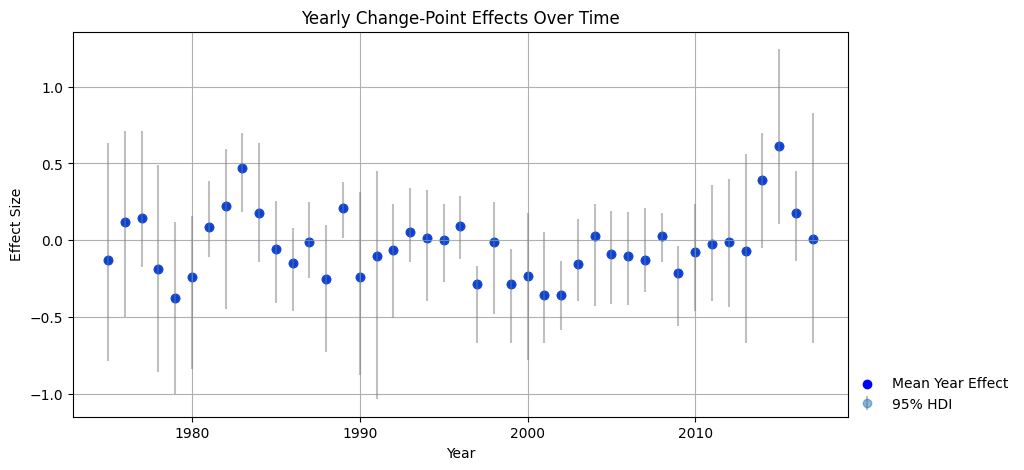

In [ ]:
trace_df = az.summary(hier_annual_effect_trace, hdi_prob=0.95)
trace_df.reset_index(inplace=True)
data = trace_df[trace_df['index'].str.startswith('year_effect')]

start_year = int(df['CalenderYear'].min())
year_labels = np.arange(start_year, start_year + len(data))

errors_below = data['mean'] - data['hdi_2.5%']
errors_above = data['hdi_97.5%'] - data['mean']

plt.figure(figsize=(10, 5))
plt.scatter(year_labels, data['mean'], color='blue', label='Mean Year Effect')
plt.errorbar(year_labels, data['mean'], yerr=[errors_below, errors_above], fmt='o', ecolor='gray', alpha=0.5, label='95% HDI')

plt.title('Yearly Change-Point Effects Over Time')
plt.xlabel('Year')
plt.ylabel('Effect Size')
plt.legend(frameon=False, loc=(1.0, 0.))
plt.grid(True)
plt.show()

In [ ]:
import statsmodels.api as sm
year_labels = np.arange(0, 43) 
means = data['mean']

X = sm.add_constant(year_labels)
y = means

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   mean   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                    0.3597
Date:                Sat, 03 Aug 2024   Prob (F-statistic):              0.552
Time:                        23:01:32   Log-Likelihood:                 5.9593
No. Observations:                  43   AIC:                            -7.919
Df Residuals:                      41   BIC:                            -4.396
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0649      0.065     -1.003      0.3

## Hierarchical change-point with sex as factor (Model 3)

In [ ]:
def get_sex_data(category):
    category = df[df.Sex==category].copy()
    sousa_names = category.SC_ID.unique()
    SC_ID = category.SC_ID.unique()
    category.id_idx = category.SC_ID.map(str.strip)
    sousa_names = category.id_idx.unique()
    n_sousa = len(sousa_names)
    id_idx_lookup = dict(zip(sousa_names, range(len(sousa_names))))
    sousa_idx = category['sousa_idx_code'] = category.SC_ID.replace(id_idx_lookup).values
    return(category)

male = get_sex_data('M')
male_sousa_names = male.SC_ID.unique()
male_idx = male['sousa_idx_code']
n_male = len(male.SC_ID.unique())

female = get_sex_data('F')
female_sousa_names = female.SC_ID.unique()
female_idx = female['sousa_idx_code']
n_female = len(female.SC_ID.unique())
  
print('Total number of male individuals  :',n_male)
print('Total number of female individuals:',n_female)

Total number of male individuals  : 14
Total number of female individuals: 18


/var/folders/j4/3gpdgvn54ts8s2nb5sm3wlx40000gn/T/ipykernel_21904/3893802089.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  category.id_idx = category.SC_ID.map(str.strip)


In [ ]:
with pm.Model() as hierarchical_model_sex:
  
    #Population Level Hyperprios
    mean_sp_pop = pm.Normal('mean_sp_pop', mu=3.5, sigma=1.)
    intercept_pop = pm.Normal('intercept_pop', 18, sigma=2.0)
    slope_pre_pop = pm.Normal('slope_pre_pop', 0, sigma=1)
    slope_post_pop = pm.Normal('slope_post_pop', 0, sigma=1)
  
    # Intermediate Level Hyperpriors
    mean_sp = pm.Normal('mean_sp', mu=mean_sp_pop, sigma=1., shape=2)
    intercept_mean = pm.Normal('intercept_mean', intercept_pop, sigma=2.0, shape=2)
    slope_pre_mean = pm.Normal('slope_pre_mean', slope_pre_pop, sigma=1, shape=2)
    slope_post_mean = pm.Normal('slope_post_mean', slope_post_pop, sigma=1, shape=2)
    
    # Population Level Switch Point
    switchpoint_m = pm.StudentT('switchpoint_m', mu = mean_sp[0], sigma=0.5, nu=10., shape=n_male)
    switchpoint_f = pm.StudentT('switchpoint_f', mu = mean_sp[1], sigma=0.5, nu=10., shape=n_female)

    # Intermediate Level 
    # Priors for pre- and post-switch intercepts and slopes
    intercept_m = pm.Normal('intercept_m', mu = intercept_mean[0], sigma=1.0, shape=n_male)
    slope_pre_m = pm.Normal('slope_pre_m', slope_pre_mean[0], sigma=1, shape=n_male)
    slope_post_m = pm.Normal('slope_post_m', slope_post_mean[0], sigma=1, shape=n_male)

    intercept_f = pm.Normal('intercept_f', mu = intercept_mean[1], sigma=1.0, shape=n_female)
    slope_pre_f = pm.Normal('slope_pre_f', slope_pre_mean[1], sigma=1, shape=n_female)
    slope_post_f = pm.Normal('slope_post_f', slope_post_mean[1], sigma=1, shape=n_female)
    
    # Sex switchpoint
    switchpoint_d15N_m = pm.Deterministic('switchpoint_d15N_m', intercept_m + slope_pre_m * switchpoint_m)
    prewean_m = intercept_m[male_idx] + slope_pre_m[male_idx] * male.GLG
    postwean_m = switchpoint_d15N_m[male_idx] + slope_post_m[male_idx] * male.GLG 

    switchpoint_d15N_f = pm.Deterministic('switchpoint_d15N_f', intercept_f + slope_pre_f * switchpoint_f)
    prewean_f = intercept_f[female_idx] + slope_pre_f[female_idx] * female.GLG
    postwean_f = switchpoint_d15N_f[female_idx] + slope_post_f[female_idx] * female.GLG 
    
    male_switch = pm.math.switch(switchpoint_m[male_idx] >= male.GLG, prewean_m, postwean_m)
    female_switch = pm.math.switch(switchpoint_f[female_idx] >= female.GLG, prewean_f, postwean_f)
    
    # Model Error
    sigma = pm.HalfCauchy('sigma', beta=1)
    
    male_likelihood = pm.Normal('male_likelihood', mu = male_switch, sigma=sigma, observed=male.d15N)
    female_likelihood = pm.Normal('female_likelihood', mu = female_switch, sigma=sigma, observed=female.d15N)
    
    diff_of_means = pm.Deterministic('diff_of_means', mean_sp[0] - mean_sp[1])
    diff_of_intercept_means = pm.Deterministic('diff_of_intercept_means', intercept_mean[0] - intercept_mean[1])
    diff_of_slope_pre_means = pm.Deterministic('diff_of_slope_pre_means', slope_pre_mean[0] - slope_pre_mean[1])
    diff_of_slope_post_means = pm.Deterministic('diff_of_slope_post_means', slope_post_mean[0] - slope_post_mean[1])

In [ ]:
with hierarchical_model_sex:
    step1 = pm.NUTS([intercept_m, slope_pre_m, slope_post_m, intercept_f, slope_pre_f, slope_post_f])
    step2 = pm.NUTS([switchpoint_m, switchpoint_f]) 

    hier_sex_trace = pm.sample(5000, tune = 10000, target_accept=.99, chains=2, step=[step1,step2], random_seed=42)

In [ ]:
switchpoint_m_mean = hier_sex_trace['switchpoint_m'].values.mean(axis=1)[0].mean(axis=0)
switchpoint_m_std = hier_sex_trace['switchpoint_m'].values.mean(axis=1)[0].std(axis=0)
switchpoint_f_mean = hier_sex_trace['switchpoint_f'].values.mean(axis=1)[0].mean(axis=0)
switchpoint_f_std = hier_sex_trace['switchpoint_f'].values.mean(axis=1)[0].std(axis=0)

intercept_m_mean = hier_sex_trace['intercept_m'].values.mean(axis=1)[0].mean(axis=0)
intercept_m_std = hier_sex_trace['intercept_m'].values.mean(axis=1)[0].std(axis=0)
intercept_f_mean = hier_sex_trace['intercept_f'].values.mean(axis=1)[0].mean(axis=0)
intercept_f_std = hier_sex_trace['intercept_f'].values.mean(axis=1)[0].std(axis=0)

slope_pre_m_mean = hier_sex_trace['slope_pre_m'].values.mean(axis=1)[0].mean(axis=0)
slope_pre_m_std = hier_sex_trace['slope_pre_m'].values.mean(axis=1)[0].std(axis=0)
slope_pre_f_mean = hier_sex_trace['slope_pre_f'].values.mean(axis=1)[0].mean(axis=0)
slope_pre_f_std = hier_sex_trace['slope_pre_f'].values.mean(axis=1)[0].std(axis=0)

slope_post_m_mean = hier_sex_trace['slope_post_m'].values.mean(axis=1)[0].mean(axis=0)
slope_post_m_std = hier_sex_trace['slope_post_m'].values.mean(axis=1)[0].std(axis=0)
slope_post_f_mean = hier_sex_trace['slope_post_f'].values.mean(axis=1)[0].mean(axis=0)
slope_post_f_std = hier_sex_trace['slope_post_f'].values.mean(axis=1)[0].std(axis=0)

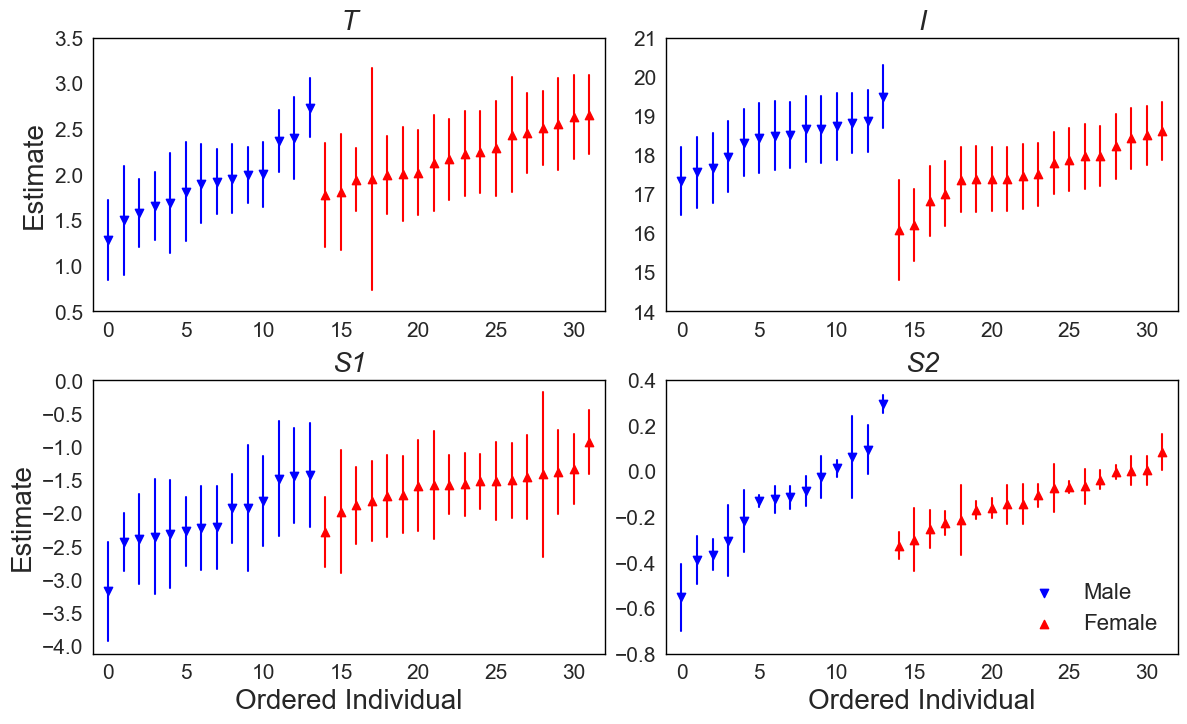

In [ ]:
def plot_estimates(plt, mean_values, std_values, names, offset, color, label=None, legend=False):
    estimates = pd.Series(mean_values, index=names)
    se = pd.Series(std_values, index=names)
    order = estimates.sort_values().index
    positions = [i + offset for i in range(len(estimates))]
    if label == 'Male':
        plt.scatter(positions, estimates[order], color=color, label=label, marker='v')
    else:
        plt.scatter(positions, estimates[order], color=color, label=label, marker='^')
    for i, m, se_val in zip(positions, estimates[order], se[order]):
        plt.plot([i, i], [m-se_val, m+se_val], '-', color=color)
    plt.xticks(ticks=[i for i in range(0, 40, 5)], fontsize=15)
    plt.yticks(fontsize=15)
    ax = plt.gca()
    if legend == True:
        plt.legend(frameon=False, fontsize=16, loc='lower right')
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1.0) 
        spine.set_visible(True)

combined_names = list(male_sousa_names) + list(female_sousa_names)

plt.figure(figsize=(14, 8))
sns.set_style("white")

plt.subplot(2, 2, 1)
plot_estimates(plt, switchpoint_m_mean, switchpoint_m_std, male_sousa_names, 0, 'blue', 'Male')
plot_estimates(plt, switchpoint_f_mean, switchpoint_f_std, female_sousa_names, 14, 'red', 'Female')
plt.xticks(ticks=[i for i in range(0, 32, 5)])
plt.title('T', fontsize=20, fontstyle='italic')
plt.ylabel('Estimate', fontsize=20)
plt.ylim(0.5, 3.5)
plt.xlim(-1, 32)

plt.subplot(2, 2, 2)
plot_estimates(plt, intercept_m_mean, intercept_m_std, male_sousa_names, 0, 'blue', 'Male')
plot_estimates(plt, intercept_f_mean, intercept_f_std, female_sousa_names, 14, 'red', 'Female')
plt.xticks(ticks=[i for i in range(0, 32, 5)])
plt.title('I', fontsize=20, fontstyle='italic')
plt.ylim(14, 21)
plt.xlim(-1, 32)

plt.subplot(2, 2, 3)
plot_estimates(plt, slope_pre_m_mean, slope_pre_m_std, male_sousa_names, 0, 'blue', 'Male')
plot_estimates(plt, slope_pre_f_mean, slope_pre_f_std, female_sousa_names, 14, 'red', 'Female')
plt.xticks(ticks=[i for i in range(0, 32, 5)])
plt.title('S1', fontsize=20, fontstyle='italic')
plt.ylabel('Estimate', fontsize=20)
plt.xlabel('Ordered Individual', size=20)
plt.xlim(-1, 32)

plt.subplot(2, 2, 4)
plot_estimates(plt, slope_post_m_mean, slope_post_m_std, male_sousa_names, 0, 'blue', 'Male', legend=True)
plot_estimates(plt, slope_post_f_mean, slope_post_f_std, female_sousa_names, 14, 'red', 'Female', legend=True)
plt.xticks(ticks=[i for i in range(0, 32, 5)])
plt.title('S2', fontsize=20, fontstyle='italic')
plt.xlabel('Ordered Individual', size=20)
plt.ylim(-0.8, 0.4)
plt.xlim(-1, 32)

plt.subplots_adjust(hspace = 0.25, wspace=0.12)
plt.savefig('sex_parameters.tiff', dpi=300, transparent=False)
plt.show()

## Hierarchical change-point with region as factor (Model 3A)

In [ ]:
import sys
def get_region_data(category):
    category = df[df.Region==category].copy()
    sousa_names = category.SC_ID.unique()
    SC_ID = category.SC_ID.unique()
    category.id_idx = category.SC_ID.map(str.strip)
    sousa_names = category.id_idx.unique()
    n_sousa = len(sousa_names)
    id_idx_lookup = dict(zip(sousa_names, range(len(sousa_names))))
    sousa_idx = category['sousa_idx_code'] = category.SC_ID.replace(id_idx_lookup).values
    return(category)

EPRE = get_region_data('EPRE')
EPRE_sousa_names = EPRE.SC_ID.unique()
EPRE_idx = EPRE['sousa_idx_code']
n_EPRE = len(EPRE.SC_ID.unique())

MPRE = get_region_data('MPRE')
MPRE_sousa_names = MPRE.SC_ID.unique()
MPRE_idx = MPRE['sousa_idx_code']
n_MPRE = len(MPRE.SC_ID.unique())

WPRE = get_region_data('WPRE')
WPRE_sousa_names = WPRE.SC_ID.unique()
WPRE_idx = WPRE['sousa_idx_code']
n_WPRE = len(WPRE.SC_ID.unique())

print('Number of EPRE Samples:',n_EPRE)
print('Number of MPRE Samples:',n_MPRE)
print('Number of WPRE Samples:',n_WPRE)

Number of EPRE Samples: 21
Number of MPRE Samples: 10
Number of WPRE Samples: 5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [ ]:
with pm.Model() as region_hierarchical_model:
    # Population Level HyperPriors
    mean_sp_pop = pm.Normal('mean_sp_pop', mu=3.5, sd=1.)
    intercept_pop = pm.Normal('intercept_pop', 18, sd=2.0)
    slope_pre_pop = pm.Normal('slope_pre_pop', 0, sd=1)
    slope_post_pop = pm.Normal('slope_post_pop', 0, sd=1)

    # Intermediate Level Hyperpriors
    mean_sp = pm.Normal('mean_sp', mu=mean_sp_pop, sd=1., shape=3)
    intercept_mean = pm.Normal('intercept_mean', intercept_pop, sd=2.0, shape=3)
    slope_pre_mean = pm.Normal('slope_pre_mean', slope_pre_pop, sd=1, shape=3)
    slope_post_mean = pm.Normal('slope_post_mean', slope_post_pop, sd=1, shape=3)

    # Priors
    switchpoint_0 = pm.StudentT('switchpoint_0', mu = mean_sp[0], sd=0.5, nu=10., shape=n_EPRE)
    switchpoint_1 = pm.StudentT('switchpoint_1', mu = mean_sp[1], sd=0.5, nu=10., shape=n_MPRE)
    switchpoint_2 = pm.StudentT('switchpoint_2', mu = mean_sp[2], sd=0.5, nu=10., shape=n_WPRE)
    
    intercept_0 = pm.Normal('intercept_0', mu = intercept_mean[0], sd=1.0, shape=n_EPRE)
    intercept_1 = pm.Normal('intercept_1', mu = intercept_mean[1], sd=1.0, shape=n_MPRE)
    intercept_2 = pm.Normal('intercept_2', mu = intercept_mean[2], sd=1.0, shape=n_WPRE)

    slope_pre_0 = pm.Normal('slope_pre_0', slope_pre_mean[0], sd=1, shape=n_EPRE)
    slope_pre_1 = pm.Normal('slope_pre_1', slope_pre_mean[1], sd=1, shape=n_MPRE)
    slope_pre_2 = pm.Normal('slope_pre_2', slope_pre_mean[2], sd=1, shape=n_WPRE)
    
    slope_post_0 = pm.Normal('slope_post_0', slope_post_mean[0], sd=1, shape=n_EPRE)
    slope_post_1 = pm.Normal('slope_post_1', slope_post_mean[1], sd=1, shape=n_MPRE)
    slope_post_2 = pm.Normal('slope_post_2', slope_post_mean[2], sd=1, shape=n_WPRE)

    switchpoint_d15N_0 = pm.Deterministic('switchpoint_d15N_0', intercept_0 + slope_pre_0 * switchpoint_0)
    switchpoint_d15N_1 = pm.Deterministic('switchpoint_d15N_1', intercept_1 + slope_pre_1 * switchpoint_1)
    switchpoint_d15N_2 = pm.Deterministic('switchpoint_d15N_2', intercept_2 + slope_pre_2 * switchpoint_2)

    prewean_0 = intercept_0[EPRE_idx] + slope_pre_0[EPRE_idx] * EPRE.GLG
    prewean_1 = intercept_1[MPRE_idx] + slope_pre_1[MPRE_idx] * MPRE.GLG
    prewean_2 = intercept_2[WPRE_idx] + slope_pre_2[WPRE_idx] * WPRE.GLG

    postwean_0 = switchpoint_d15N_0[EPRE_idx] + slope_post_0[EPRE_idx] * EPRE.GLG 
    postwean_1 = switchpoint_d15N_1[MPRE_idx] + slope_post_1[MPRE_idx] * MPRE.GLG 
    postwean_2 = switchpoint_d15N_2[WPRE_idx] + slope_post_2[WPRE_idx] * WPRE.GLG 

    EPRE_switch = pm.math.switch(switchpoint_0[EPRE_idx] >= EPRE.GLG, prewean_0, postwean_0)
    MPRE_switch = pm.math.switch(switchpoint_1[MPRE_idx] >= MPRE.GLG, prewean_1, postwean_1)
    WPRE_switch = pm.math.switch(switchpoint_2[WPRE_idx] >= WPRE.GLG, prewean_2, postwean_2)
    
    # Model Error
    sigma = pm.HalfCauchy('sigma', beta=1)
    
    EPRE_likelihood = pm.Normal('EPRE_likelihood', mu = EPRE_switch, sd=sigma, observed=EPRE.d15N)
    MPRE_likelihood = pm.Normal('MPRE_likelihood', mu = MPRE_switch, sd=sigma, observed=MPRE.d15N)
    WPRE_likelihood = pm.Normal('WPRE_likelihood', mu = WPRE_switch, sd=sigma, observed=WPRE.d15N)

    # Diff of T
    diff_T_EM = pm.Deterministic('diff_T_EM', mean_sp[0] - mean_sp[1])
    diff_T_EW = pm.Deterministic('diff_T_EW', mean_sp[0] - mean_sp[2])
    diff_T_MW = pm.Deterministic('diff_T_MW', mean_sp[1] - mean_sp[2])
    # Diff of I
    diff_int_EM = pm.Deterministic('diff_int_EM', intercept_mean[0] - intercept_mean[1])
    diff_int_EW = pm.Deterministic('diff_int_EW', intercept_mean[0] - intercept_mean[2])
    diff_int_MW = pm.Deterministic('diff_int_MW', intercept_mean[1] - intercept_mean[2])
    # Diff of S1
    diff_S1_EM = pm.Deterministic('diff_S1_EM', slope_pre_mean[0] - slope_pre_mean[1])
    diff_S1_EW = pm.Deterministic('diff_S1_EW', slope_pre_mean[0] - slope_pre_mean[2])
    diff_S1_MW = pm.Deterministic('diff_S1_MW', slope_pre_mean[1] - slope_pre_mean[2])
    # Diff of S2
    diff_S2_EM = pm.Deterministic('diff_S2_EM', slope_post_mean[0] - slope_post_mean[1])
    diff_S2_EW = pm.Deterministic('diff_S2_EW', slope_post_mean[0] - slope_post_mean[2])
    diff_S2_MW = pm.Deterministic('diff_S2_MW', slope_post_mean[1] - slope_post_mean[2])

In [ ]:
with region_hierarchical_model:
    step1 = pm.NUTS([intercept_0, intercept_1, intercept_2, slope_pre_0, slope_pre_1, slope_pre_2, 
                     slope_post_0, slope_post_1, slope_post_2])
    step2 = pm.NUTS([switchpoint_0, switchpoint_1, switchpoint_2]) 

    hier_trace_region = pm.sample(10000, tune = 10000, target_accept=.99, chains=2, step=[step1,step2], random_seed=42)

Text(0.5, 1.0, 'Regional Differential in time of Ontogenetic Dietary Shift')

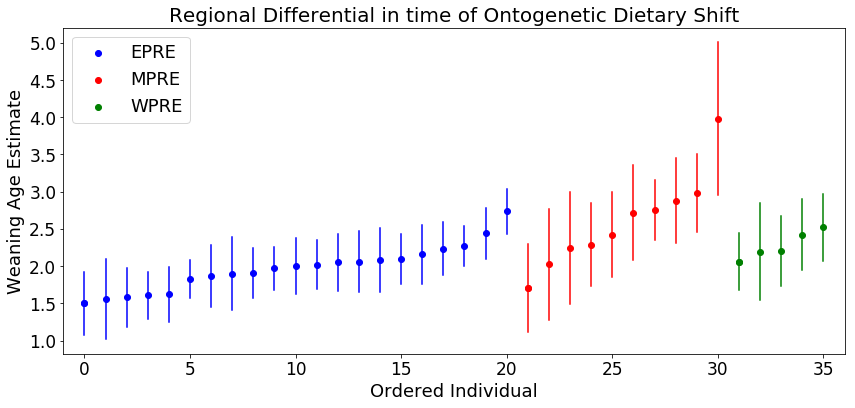

In [ ]:
EPRE_mean = pd.Series(hier_trace_region['switchpoint_0'].mean(axis=0), index=EPRE_sousa_names)
EPRE_se = pd.Series(hier_trace_region['switchpoint_0'].std(axis=0), index=EPRE_sousa_names)
EPRE_order = EPRE_mean.sort_values().index
MPRE_mean = pd.Series(hier_trace_region['switchpoint_1'].mean(axis=0), index=MPRE_sousa_names)
MPRE_se = pd.Series(hier_trace_region['switchpoint_1'].std(axis=0), index=MPRE_sousa_names)
MPRE_order = MPRE_mean.sort_values().index
WPRE_mean = pd.Series(hier_trace_region['switchpoint_2'].mean(axis=0), index=WPRE_sousa_names)
WPRE_se = pd.Series(hier_trace_region['switchpoint_2'].std(axis=0), index=WPRE_sousa_names)
WPRE_order = WPRE_mean.sort_values().index

plt.figure(figsize=(14, 6))
plt.scatter(range(len(EPRE_mean)), EPRE_mean[EPRE_order], color='blue')
plt.scatter(0, EPRE_mean[EPRE_order[0]], color='blue',label='EPRE')
plt.scatter(range(21,31), MPRE_mean[MPRE_order], color='red')
plt.scatter(21, MPRE_mean[MPRE_order[0]], color='red',label='MPRE')
plt.scatter(range(31,36), WPRE_mean[WPRE_order], color='green')
plt.scatter(31, WPRE_mean[WPRE_order[0]], color='green',label='WPRE')

for i, m, se in zip(range(len(EPRE_mean)), EPRE_mean[EPRE_order], EPRE_se[EPRE_order]):
    plt.plot([i,i], [m-se, m+se], '-', color='blue')
for i, m, se in zip(range(len(MPRE_mean)), MPRE_mean[MPRE_order], MPRE_se[MPRE_order]):
    plt.plot([i+21,i+21], [m-se, m+se], '-',color='red')
for i, m, se in zip(range(len(WPRE_mean)), WPRE_mean[WPRE_order], WPRE_se[WPRE_order]):
    plt.plot([i+31,i+31], [m-se, m+se], '-',color='green')

plt.xlim(-1,36); 
plt.tick_params(axis='both', which='major', labelsize=17)
plt.ylabel('Weaning Age Estimate', size=18);
plt.xlabel('Ordered Individual', size=18);
plt.legend(prop={'size': 18}, loc='upper left', facecolor='white',frameon=True)
plt.title('Regional Differential in time of Ontogenetic Dietary Shift', fontsize=20)

## Carbon isotope difference in first GLG

In [ ]:
male_glg = df[(df['Sex'] == 'M') & (df['GLG']==1)]['d13C'].values
female_glg = df[(df['Sex'] == 'F') & (df['GLG']==1)]['d13C'].values

with pm.Model() as d13c_model:
    mu_m = pm.Normal('mu_m', mu=-15, sigma=2)
    mu_f = pm.Normal('mu_f', mu=-15, sigma=2)
    sigma_m = pm.HalfCauchy('sigma_m', beta=1)
    sigma_f = pm.HalfCauchy('sigma_f', beta=1)
    male = pm.Normal('male', mu=mu_m, sigma=sigma_m, observed=male_glg)
    female = pm.Normal('female', mu=mu_f, sigma=sigma_f, observed=female_glg)
    
    diff_of_means = pm.Deterministic('diff_of_means', mu_m - mu_f)
    diff_of_stds = pm.Deterministic('diff_of_stds', sigma_m - sigma_f)
    d13C_glg1_trace = pm.sample(5000, tune=1000, random_seed=42)

In [ ]:
az.summary(d13C_glg1_trace, hdi_prob=0.95)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_m,-15.218,0.187,-15.594,-14.856,0.002,0.001,10251.0,7749.0,1.0
mu_f,-14.383,0.227,-14.822,-13.931,0.002,0.002,11198.0,8060.0,1.0
sigma_m,0.684,0.148,0.444,0.979,0.002,0.001,10626.0,7749.0,1.0
sigma_f,0.958,0.174,0.649,1.308,0.002,0.001,12712.0,8530.0,1.0
diff_of_means,-0.835,0.294,-1.403,-0.249,0.003,0.002,10841.0,8989.0,1.0
diff_of_stds,-0.274,0.227,-0.746,0.161,0.002,0.002,10871.0,8377.0,1.0
